## Script to generate figure 1

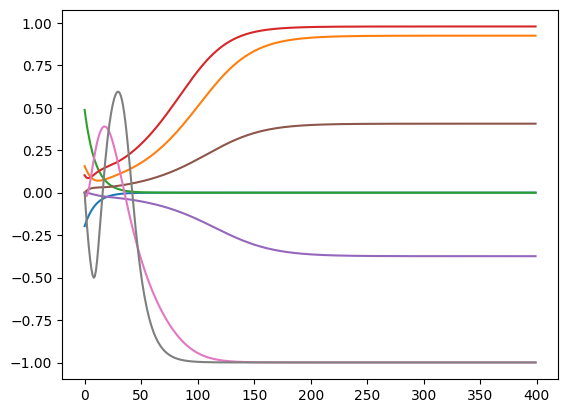

In [11]:
import sys
from pathlib import Path
sys.path.append(str(Path('.').resolve().parent))
import matplotlib.pyplot as plt
import module_ESN
import module_graph
from netgraph import Graph as plotGraph
param_grid = {
    'n': [10], 
    'trials': [50],
    'proxy_discard': [50],
    'goal_discard': [350],
    'measure_time': [50],
    'spectral_radius': [1.25],
    'alpha': [0.1],
    "avg_number_of_edges": [2],
    "number_of_action_nodes": [4],
    "seed": [6]                          # note that picking the seed is only ok because the goal of this figure is to be illustrative.
}

param_ESN = dict(zip(param_grid.keys(), [param_grid[k][0] for k in param_grid.keys()]))
esn = module_ESN.EchoStateNetwork(param_ESN['n'],  spectral_radius=param_ESN['spectral_radius'], alpha = param_ESN['alpha'], 
                            avg_number_of_edges=param_ESN['avg_number_of_edges'], proxy_discard=param_ESN['proxy_discard'],
                            goal_discard=param_ESN['goal_discard'], measure_time=param_ESN['measure_time'], 
                            seed=param_ESN['seed'],number_of_action_nodes=param_ESN['number_of_action_nodes'])
actions = module_ESN.get_base_action_value(len(esn.action_nodes))
states = esn.run( agent_values=actions)
plt.plot(states[:, 0:8], label='goal node')
plt.show()


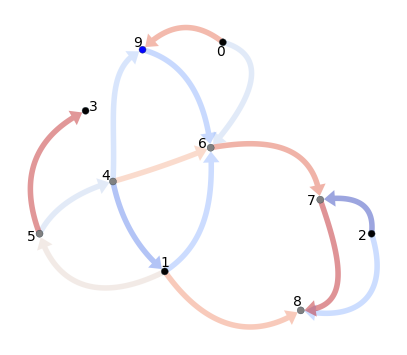

think about citing netgraph : Brodersen, P. J. N., (2023). Netgraph: Publication-quality Network Visualisations in Python. Journal of Open Source Software, 8(87), 5372, https://doi.org/10.21105/joss.05372


In [12]:
def plot_graph_cool_esn(ESN, show_numbers = False, proxy_node = None ):
    G = module_graph.outputgraph(ESN.W)
    cmap = 'coolwarm'
    n = max(G.nodes())
    colors = { node:  'b'*(node == n)+  'gray'*(ESN.number_of_action_nodes<=node and node<n) + 'k'*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    if proxy_node :
        colors[proxy_node] = 'r'
    labs = {node: str(node) for node in G.nodes() if show_numbers}
    plt.figure(figsize=(5, 5))
    plotGraph(G, node_size=1,edge_width=1.5,node_edge_width = 0.1,arrows = True, directed= True, edge_cmap=cmap, node_color=colors, node_labels = labs,node_label_offset=0.025, node_alpha=0.99, 
              edge_layout = "curved", 
              node_layout='spring')
    plt.show()


plot_graph_cool_esn(esn, show_numbers=True)

print("think about citing netgraph : Brodersen, P. J. N., (2023). Netgraph: Publication-quality Network Visualisations in Python. Journal of Open Source Software, 8(87), 5372, https://doi.org/10.21105/joss.05372")

*************** pos graph ***************


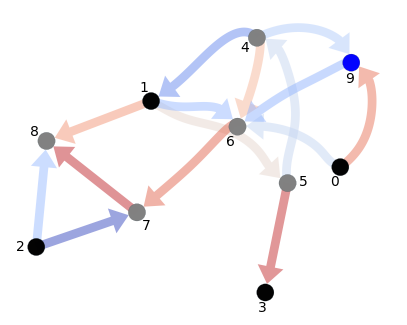

{0: array([ 0.74023469, -0.05721062]), 6: array([0.15194481, 0.17433744]), 9: array([0.8029771 , 0.54056745]), 1: array([-0.34278265,  0.32082743]), 5: array([ 0.43864819, -0.14864028]), 8: array([-0.94133524,  0.09236912]), 2: array([-1.        , -0.51435269]), 7: array([-0.42360822, -0.31625376]), 4: array([0.26289932, 0.68307201]), 3: array([ 0.311022  , -0.77471609])}


In [14]:
from netgraph._edge_layout import *
import numpy as np
def plot_graph_cool_esn(ESN, show_numbers = False, proxy_node = None, pos=None, seed=0):
    import networkx as nx
    node_size = 5.0
    G = module_graph.outputgraph(ESN.W)
    cmap = 'coolwarm'
    H = G.__class__()                     # keeps Graph vs DiGraph
    H.add_nodes_from(G.nodes(data=True))   # copy node attrs
    H.add_edges_from(
        (u, v, {k: val for k, val in d.items() if k != "weight"})
        for u, v, d in G.edges(data=True)
    )
    n = max(G.nodes())
    pos = nx.kamada_kawai_layout(H)  
    
    edge_paths = get_curved_edge_paths(list(G.edges()), pos, selfloop_radius=  0.1,node_size=node_size)
    for (a,b), path in edge_paths.items():
        if a< b and (b,a) in edge_paths:
           edge_paths[(b,a)] = path[::-1] 
    colors = { node:  'b'*(node == n)+  'gray'*(ESN.number_of_action_nodes<=node and node<n) + 'k'*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    if proxy_node:
        colors[proxy_node] = 'r'
    labs = {node: str(node) for node in G.nodes() if show_numbers}
    print("*************** pos graph ***************")
    plt.figure(figsize=(5, 5))
    plotGraph(G,
              node_layout=pos,
              edge_layout=edge_paths,
              node_size=node_size,
              edge_width=5.,
              node_edge_width=0.1,
              arrows=True,
              directed=True,
              edge_cmap=cmap,
              node_color=colors,
              node_labels=labs,
              node_label_offset=0.09,
              node_alpha=0.99)
    plt.show()
    print(pos)

plot_graph_cool_esn(esn, show_numbers=True)

In [4]:
pip install netgraph

Note: you may need to restart the kernel to use updated packages.
